## Storytelling Data Visualization on Exchange Rate

#### The focus of this project is on the exchange rate between the Euro and the American dollar during the listed events.
- 2007-2008 Financial Crisis.
- During the last three US presidents (George W. Bush (2001-2009), Barak Obama (2009-2017), and Donald Trump (2017-2021)).
- Coronavirus pandemic.

In [2]:
import pandas as pd
exchange_rates = pd.read_csv('H:/Projects/euro-daily-hist_1999_2021.csv')
exchange_rates.head()

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
0,2021-09-20,NaN,1.6201,1.9558,6.2495,1.5056,1.0883,7.5726,NaN,25.432,...,86.0700,10.2173,1.5839,NaN,NaN,39.0620,10.1512,NaN,1.1711,17.3301
1,2021-09-17,NaN,1.6111,1.9558,6.2039,1.4913,1.0931,7.6044,NaN,25.296,...,85.4338,10.1553,1.5851,NaN,NaN,39.1450,10.1323,NaN,1.1780,17.1891
2,2021-09-16,NaN,1.6077,1.9558,6.1611,1.4863,1.0886,7.5849,NaN,25.281,...,85.2347,10.1518,1.5805,NaN,NaN,38.9180,9.9663,NaN,1.1763,17.0544
3,2021-09-15,NaN,1.6153,1.9558,6.1979,1.5004,1.0845,7.6069,NaN,25.318,...,85.9738,10.1360,1.5860,NaN,NaN,38.8650,9.9769,NaN,1.1824,16.8973
4,2021-09-14,NaN,1.6114,1.9558,6.1788,1.4951,1.0887,7.6168,NaN,25.389,...,86.1062,10.1453,1.5870,NaN,NaN,38.9270,9.9848,NaN,1.1814,16.8097


The dataset describes Euro daily exchange rates between 1999 and 2021. The euro (€) is the official currency in most of the countries of the European Union.

In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5878 non-null   object 
 1   [Argentine peso ]         5383 non-null   object 
 2   [Australian dollar ]      5878 non-null   object 
 3   [Bulgarian lev ]          5476 non-null   object 
 4   [Brazilian real ]         5610 non-null   object 
 5   [Canadian dollar ]        5878 non-null   object 
 6   [Swiss franc ]            5878 non-null   object 
 7   [Chinese yuan renminbi ]  5610 non-null   object 
 8   [Cypriot pound ]          2346 non-null   object 
 9   [Czech koruna ]           5878 non-null   object 
 10  [Danish krone ]           5878 non-null   object 
 11  [Algerian dinar ]         5383 non-null   object 
 12  [Estonian kroon ]         3130 non-null   object 
 13  [UK pound sterling ]      5878 non-null   object 
 14  [Greek d

### Data Cleaning

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Time,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],US_dollar,[South African rand ]
0,1999-01-04,NaN,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,...,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,NaN,1.1789,6.9358
1,1999-01-05,NaN,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,...,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,NaN,1.1790,6.7975
2,1999-01-06,NaN,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,...,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,NaN,1.1743,6.7307
3,1999-01-07,NaN,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,...,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,NaN,1.1632,6.8283
4,1999-01-08,NaN,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,...,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,NaN,1.1659,6.7855


In [5]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3532     6
          ..
1.1977     1
1.2140     1
0.9147     1
0.8406     1
1.4132     1
Name: US_dollar, Length: 3576, dtype: int64

In [6]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5816 entries, 0 to 5877
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5816 non-null   datetime64[ns]
 1   US_dollar  5816 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 136.3 KB


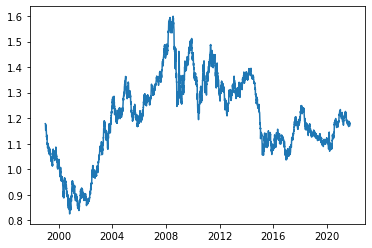

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

**On the line shape We see many wiggles rather than seeing a smooth line. 
These are visual representation of the daily variation in the exchange rate. 
The rate only shows clear upward or download trends in the longer run(months or years), 
we use the rolling mean to show the long-term trends.**

### Rolling Mean

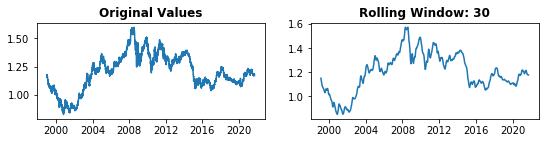

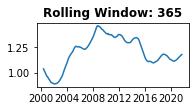

In [21]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original Values', weight = 'bold')

for i, rolling_mean in zip([2,3], [30,365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window: ' + str(rolling_mean), weight='bold')
    
    #plt.tight_layout()
    plt.show()

In [22]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5873,2021-09-14,1.1814,1.178560
5874,2021-09-15,1.1824,1.178437
5875,2021-09-16,1.1763,1.178147
5876,2021-09-17,1.1780,1.178057


## Storytelling Data Visualization Examples

#### Creating Story With Series of Events

**We will show how the euro-dollar rate changed during the following events:**

- 2007-2008 Financial Crisis.
- During the last three US presidents (George W. Bush (2001-2009), Barak Obama (2009-2017), and Donald Trump (2017-2021)).
- Coronavirus pandemic.

#### Euro-Dollar Rate Change During 2007-2008 Fianancial Crisis

In [23]:
FC = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2006)
                                &(euro_to_dollar['Time'].dt.year <= 2009) ]

FC_07_08 = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2007)
                                &(euro_to_dollar['Time'].dt.year <= 2008) ]

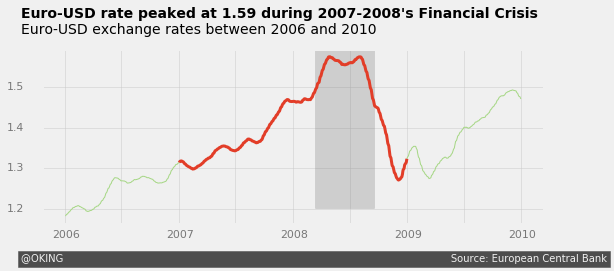

In [27]:
## Adding the Plot (using FiveThirtyEight Style)

import matplotlib.style as style

style.use('fivethirtyeight')

fig,ax = plt.subplots(figsize=(8,3))
ax.plot(FC['Time'],FC['rolling_mean'], 
        linewidth=1, color='#A6D785')

# 2007-2008 Period
ax.plot(FC_07_08['Time'], FC_07_08['rolling_mean'],
        linewidth=3, color='#e23d28')

# Peak of the crisis
ax.axvspan(xmin=733112.0, xmax=733302.0, ymin=0.09, 
           alpha=0.3, color='grey')
# Adding Tick Labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x=732272.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x+=365
y=1.193
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(732127.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.1

ax.text(732172.0, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's Financial Crisis", weight='bold')
ax.text(732172.0, 1.63, "Euro-USD exchange rates between 2006 and 2010")

ax.text(732172.0, 1.07, '@OKING'+ ' '*124 + 'Source: European Central Bank', color='#f0f0f0', backgroundcolor='#4d4d4d',size=10)

ax.grid(alpha=0.5)

plt.show()

#### Euro-Dollar Rate During Last Three US Presidents Tenure

In [28]:
bush_obama_trump = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >=2001) & (euro_to_dollar['Time'].dt.year <= 2021)]

bush = bush_obama_trump.copy()[bush_obama_trump['Time'].dt.year < 2009]

obama = bush_obama_trump.copy()[(bush_obama_trump['Time'].dt.year >= 2009)& (bush_obama_trump['Time'].dt.year < 2017)]

trump = bush_obama_trump.copy()[(bush_obama_trump['Time'].dt.year >= 2017)& (bush_obama_trump['Time'].dt.year < 2021)]

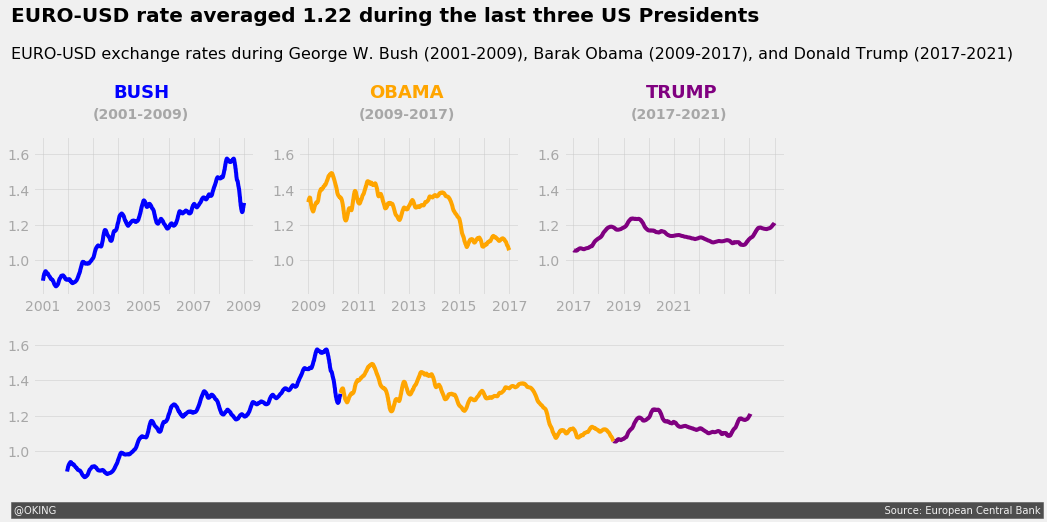

In [35]:
# Adding Plots using Fivethirtyeight style

plt.figure(figsize=(12,6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'], alpha=0.3)
    
    ax.grid(alpha=0.5)
    
# ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'], color='blue')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'], alpha=0.3)
ax1.text(731516.0, 1.92, 'BUSH', fontsize=18, weight='bold', color='blue')
ax1.text(731216.0, 1.8, '(2001-2009)', weight='bold', alpha=0.3)


# ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'], color='orange')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'], alpha=0.3)
ax2.text(734288.0, 1.92, 'OBAMA', fontsize=18, weight='bold', color='orange')
ax2.text(734138.0, 1.8, '(2009-2017)', weight='bold', alpha=0.3)

# ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'], color='purple')
ax3.set_xticklabels(['2017', '', '2019', '', '2021'], alpha=0.3)
ax3.text(736855.0, 1.92, 'TRUMP', fontsize=18, weight='bold', color='purple')
ax3.text(736745.0, 1.8, '(2017-2021)', weight='bold', alpha=0.3)


#ax4: Bush-Obama-Trump

ax4.plot(bush['Time'], bush['rolling_mean'], color='blue')
ax4.plot(obama['Time'], obama['rolling_mean'], color='orange')
ax4.plot(trump['Time'], trump['rolling_mean'], color='purple')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009', '', '2011', '', '2013', '', '2015', '', '2017', '', '2019', '', '2021'], alpha=0.3)
#ax4.grid(alpha=0.5)
ax4.set_xticks([])

ax1.text(730016.0, 2.35, 'EURO-USD rate averaged 1.22 during the last three US Presidents', fontsize=20,weight='bold')
ax1.text(730016.0, 2.14, '' 'EURO-USD exchange rates during George W. Bush (2001-2009), Barak Obama (2009-2017), and Donald Trump (2017-2021)''', fontsize=16)

ax4.text(729916.0, 0.65, '@OKING'+ ' '*265 + 'Source: European Central Bank', color='#f0f0f0', backgroundcolor='#4d4d4d',size=10)

plt.show()


#### Euro-Dollar Rate Change During Covid-19 Pandemic

In [30]:
CP_compare = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >=2018) & 
                                             (euro_to_dollar['Time'].dt.year <= 2021)]

covid19_pandemic = CP_compare.copy()[(CP_compare['Time'].dt.year >= 2020)
                                               & (CP_compare['Time'].dt.year <= 2021)]


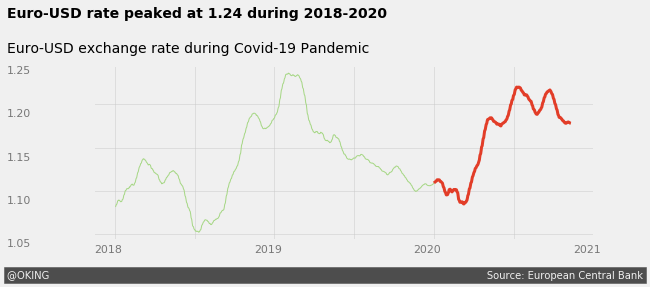

In [70]:
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(CP_compare['Time'],CP_compare['rolling_mean'], 
        linewidth=1, color='#A6D785')

# Covid-19 Period
ax.plot(covid19_pandemic['Time'], covid19_pandemic['rolling_mean'],
        linewidth=3, color='#e23d28')

# Adding Tick Labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x=735872.0
for year in ['2018', '', '2019', '', '2020', '', '2021']:
    ax.text(x, 1.03, year, alpha=0.5, fontsize=11)
    x+=365
y=1.036
for rate in ['1.05', '1.10', '1.15', '1.20', '1.25']:
    ax.text(735472.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.05
    
ax.text(735472.0, 1.30, "Euro-USD rate peaked at 1.24 during 2018-2020", weight='bold')
ax.text(735472.0, 1.26, "Euro-USD exchange rate during Covid-19 Pandemic")

ax.text(735472.0, 1.00,'@OKING'+ ' '*140 + 'Source: European Central Bank', color='#f0f0f0', backgroundcolor='#4d4d4d',size=10)

ax.grid(alpha=0.5)

plt.show()